<a href="https://colab.research.google.com/github/future-an0923/AIFFEL_quest_cr/blob/main/MainQuest/Quest02/quest02_c_jinyong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distinguishing the Legendary Pokémon

https://www.kaggle.com/datasets/abcsds/pokemon

# 단계 0.설계

포켓몬의 특성을 이용해서 전설의 포켓몬을 구별해내기 위해서 아래의 목차를 따라 프로젝트를 진행한다.

1. 데이터 불러오기
    - https://www.kaggle.com/datasets/abcsds/pokemon를 참고한다.
    -  데이터셋에는 총 몇 가지의 정보가 담겨있는지 확인한다.
    - 데이터셋을 pandas로 불러온다.
     - 결측치를 먼저 확인한다.
     - 데이터셋의 전체 컬럼을 확인한다.
    - 각 featrue의 특징 혹은 feature 간의 관계를 파악한다.
      - featrue의 분포를 그래프로 그려 알반 포켓몬과 전설의 포켓몬의 차이를 확인한다.

2. 데이터 전처리
    - 데이터 불러오기에서 이름에 대한 전처리를 해준다.
    - 추가적으로 필요 feature가 있다면 생성하여 데이터에 추가 시켜준다.

3. 모델링
   - 피쳐 엔지니어링을 하기 전과 후의 결과를 확인하고 그 결과를 분석한다.

4. 비교 모델
   - 다른 모델들과 비교하여 결과를 확인하고 그 결과를 분석한다.

# 단계 1.데이터 분석하기
---

### Loda Data
주어진 데이터 파일을 읽어들여 온다.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from google.colab import files
import pandas as pd

라이브러리 가져오기

In [15]:
# 파일 업로드
uploaded = files.upload()

# 업로드된 파일명으로 DataFrame 생성
file_name = list(uploaded.keys())[0]
original_data = pd.read_csv(file_name)

Saving Pokemon.csv to Pokemon (3).csv


### Date Description
https://www.kaggle.com/datasets/abcsds/pokemon에서 확인할 수 있었던 데이터의 정보는 다음과 같다.

In [22]:
# 데이터셋의 전체 컬럼
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### File descriptions
- Pokemon.csv - 이 데이터 세트에는 721마리의 포켓몬이 포함되어 있으며, 여기에는 포켓몬의 번호, 이름, 첫 번째와 두 번째 유형, 그리고 기본 통계가 포함됩니다: HP, 공격, 방어, 특수 공격, 특수 방어, 그리고 속도를 가지고 있다.
#### Data fields
-'#' : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int
-Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str
-Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str
-Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str
-Total : 전체 6가지 스탯의 총합. int
-HP : 포켓몬의 체력. int
-Attack : 물리 공격력. (scratch, punch 등) -int
-Defense : 물리 공격에 대한 방어력. int
-Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int
-Sp. Def : 특수 공격에 대한 방어력. int
-Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int
-Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
-Legendary : 전설의 포켓몬 여부. !! Target feature !! bool

### 데이터셋의 크기 확인

In [19]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### 전설의 포켓몬인지 아닌지의 여부

우리가 타겟으로 두고 확인할 데이터는 Legendary (전설의 포켓몬인지 아닌지의 여부)이므로, Legendary == True 값을 가지는 레전드 포켓몬 데이터셋은 legendary 변수에, Legendary == False 값을 가지는 일반 포켓몬 데이터셋은 ordinary 변수에 저장

In [20]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [21]:
#일반 포켓몬의 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### 결측치 먼저 확인

In [23]:
pokemon.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


Type 2 컬럼에만 총 386개의 결측치
두 번째 속성이 없는 포켓몬이 있다.

#### ID와 이름

In [24]:
len(set(pokemon["#"]))

721

전체 데이터는 총 800개인데 #컬럼을 집합으로 만든 자료형은 그보다 작은 721개의 데이터를 가진다.

In [25]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


예를 들어 #6의 포켓몬은 Charizard, CharizardMega Charizard X, CharizardMega Charizard Y 세 개로 나뉩니다.
기본 포켓몬인 Charizard(리자몽)로부터 시작해서 진화한 Mega Charizard가 있고, X, Y는 버전을 나타내는 것으로 보인다.

In [26]:
# 모든 이름이 유일한 이름인지만 확인
unique_names = set(pokemon["Name"])
unique_name_count = len(unique_names)
print(f"유일한 포켓몬 이름의 개수: {unique_name_count}")

유일한 포켓몬 이름의 개수: 800


이름은 데이터셋 전체 값과 같기 때문에 모든 이름은 유일한 것을 알 수 있다.

####포켓몬의 속성

In [27]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


6번 포켓몬인 Charizard는 Fire와 Flying 속성 두 가지를, 8번 포켓몬인 Wartortle은 Water 속성 한 가지만 가진다. 속성을 가지지 않는 곳엔 NaN값이 들어가 있다.

In [28]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

각 속성의 종류에서 Type 1에는 총 18가지, Type 2에는 총 19가지의 속성이 들어가 있다.

In [31]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

파이썬 차집합 함수를 통해 NaN 데이터 외의 나머지 18가지 속성은 Type 1, Type 2 모두 같은 세트의 데이터가 들어가 있음을 알 수 있다.

In [32]:
# 포켓몬들의 모든 Type을 types 변수에 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Normal', 'Ghost', 'Psychic', 'Fire', 'Dark', 'Electric', 'Bug', 'Ground', 'Water', 'Rock', 'Ice', 'Fighting', 'Dragon', 'Grass', 'Fairy', 'Flying', 'Steel', 'Poison']


In [33]:
# 데이터가 비어있는 NaN값의 개수를 확인
pokemon["Type 2"].isna().sum()

386

isna() 함수를 활용하여 총 386개의 포켓몬은 속성을 하나만 가지고, 나머지는 두 개의 속성을 가진다는 것을 확인할 수 있다.

##### 데이터 분포 plot

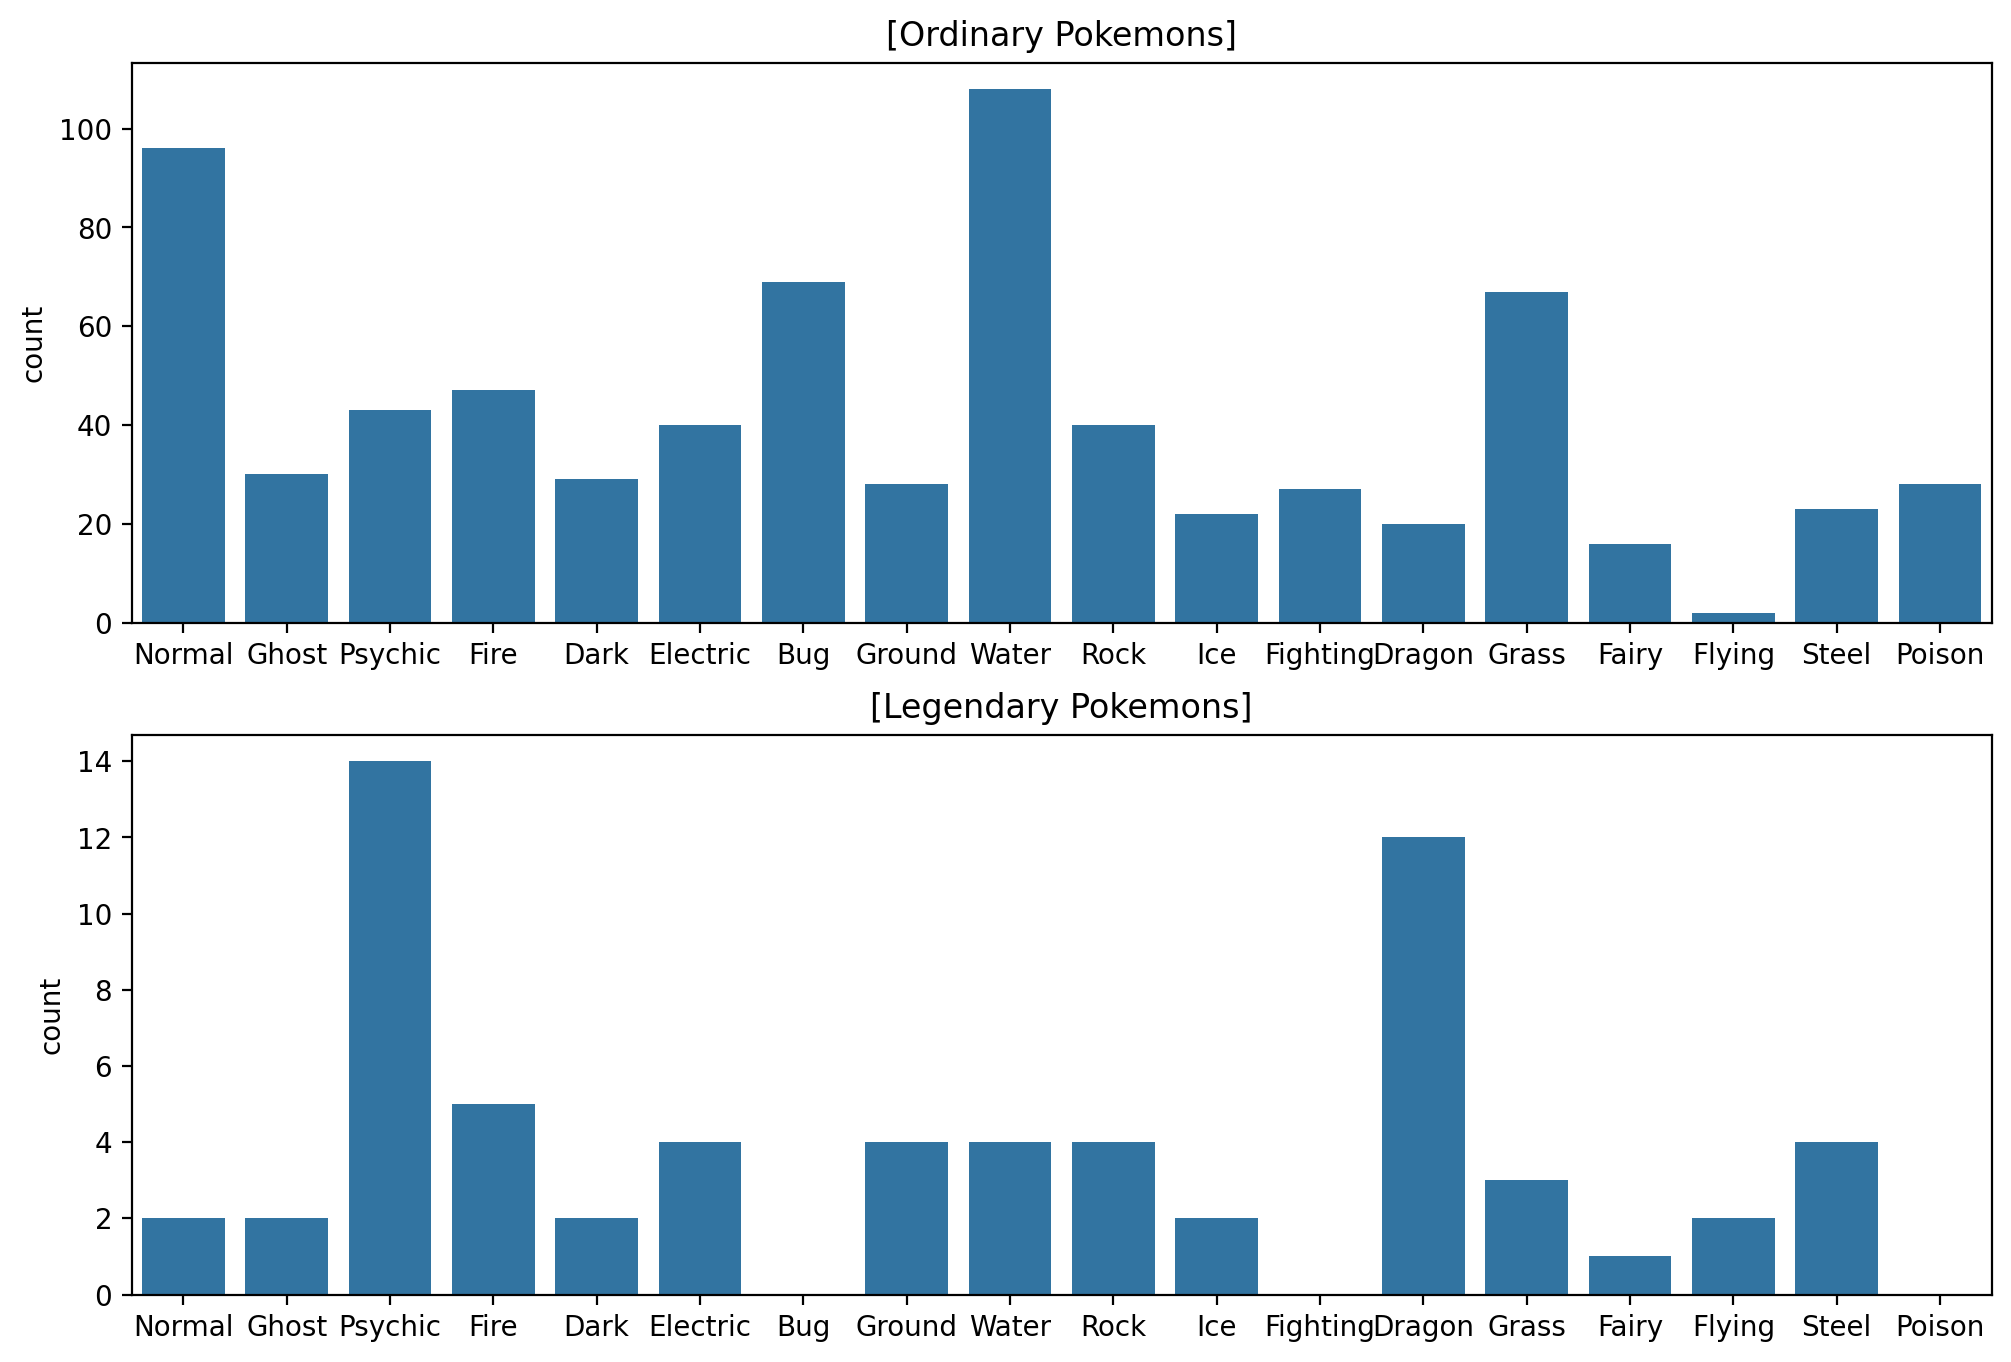

In [43]:
# Type 1 일반 포켓몬과 전설의 포켓몬 속성 분포
plt.figure(figsize=(12, 8))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

일반 포켓몬에는 Normal, Water의 속성이 가장 많지만, 전설의 포켓몬에는 Dragon, Psychic 속성이 가장 많다.

In [38]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


Legendary 비율이 가장 높은 속성은 Flying으로 50%의 비율을 갖는걸 확인할 수 있다.

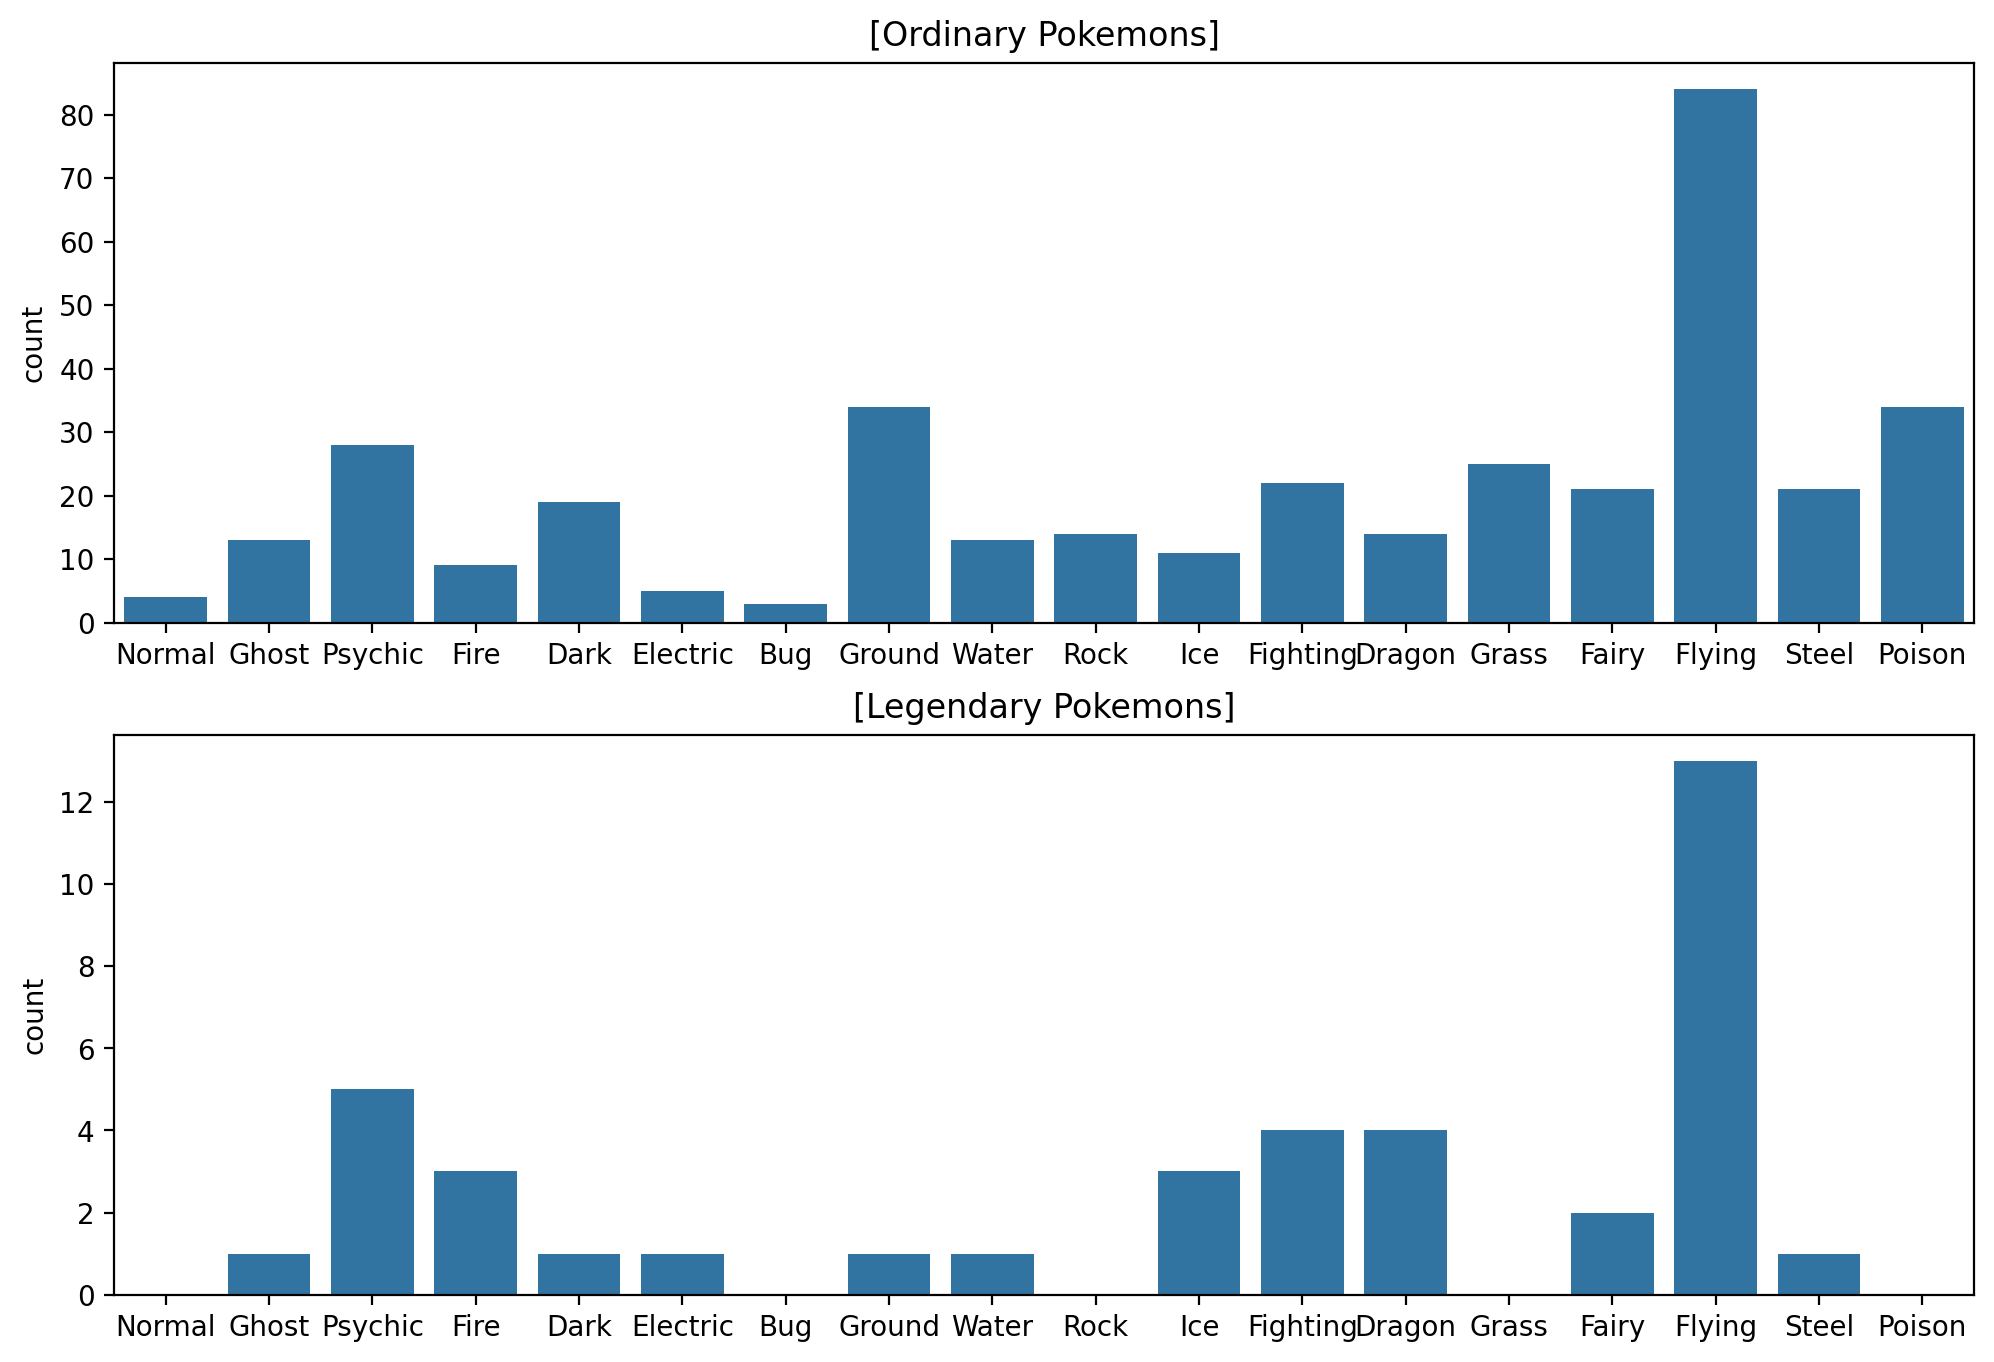

In [42]:
# Type 2 일반 포켓몬과 전설의 포켓몬 속성 분포
plt.figure(figsize=(12, 8))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없다.

In [44]:
# Type2별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


Type 2에서는 Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높다.

#### 모든 스탯의 총합

In [45]:
# 모든 스탯의 종류를 stats라는 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [46]:
# 전체 포켓몬에 대해 Total 값이 stats의 총합과 같은지 확인
total_count = sum(pokemon['Total'] == pokemon[stats].sum(axis=1))
print(f"전체 포켓몬에 대해 Total 값이 stats의 총합과 같은지 확인: {total_count}")

전체 포켓몬에 대해 Total 값이 stats의 총합과 같은지 확인: 800


전부 다 같은 것을 확인할 수 있다.

##### Total값에 따른 분포 plot

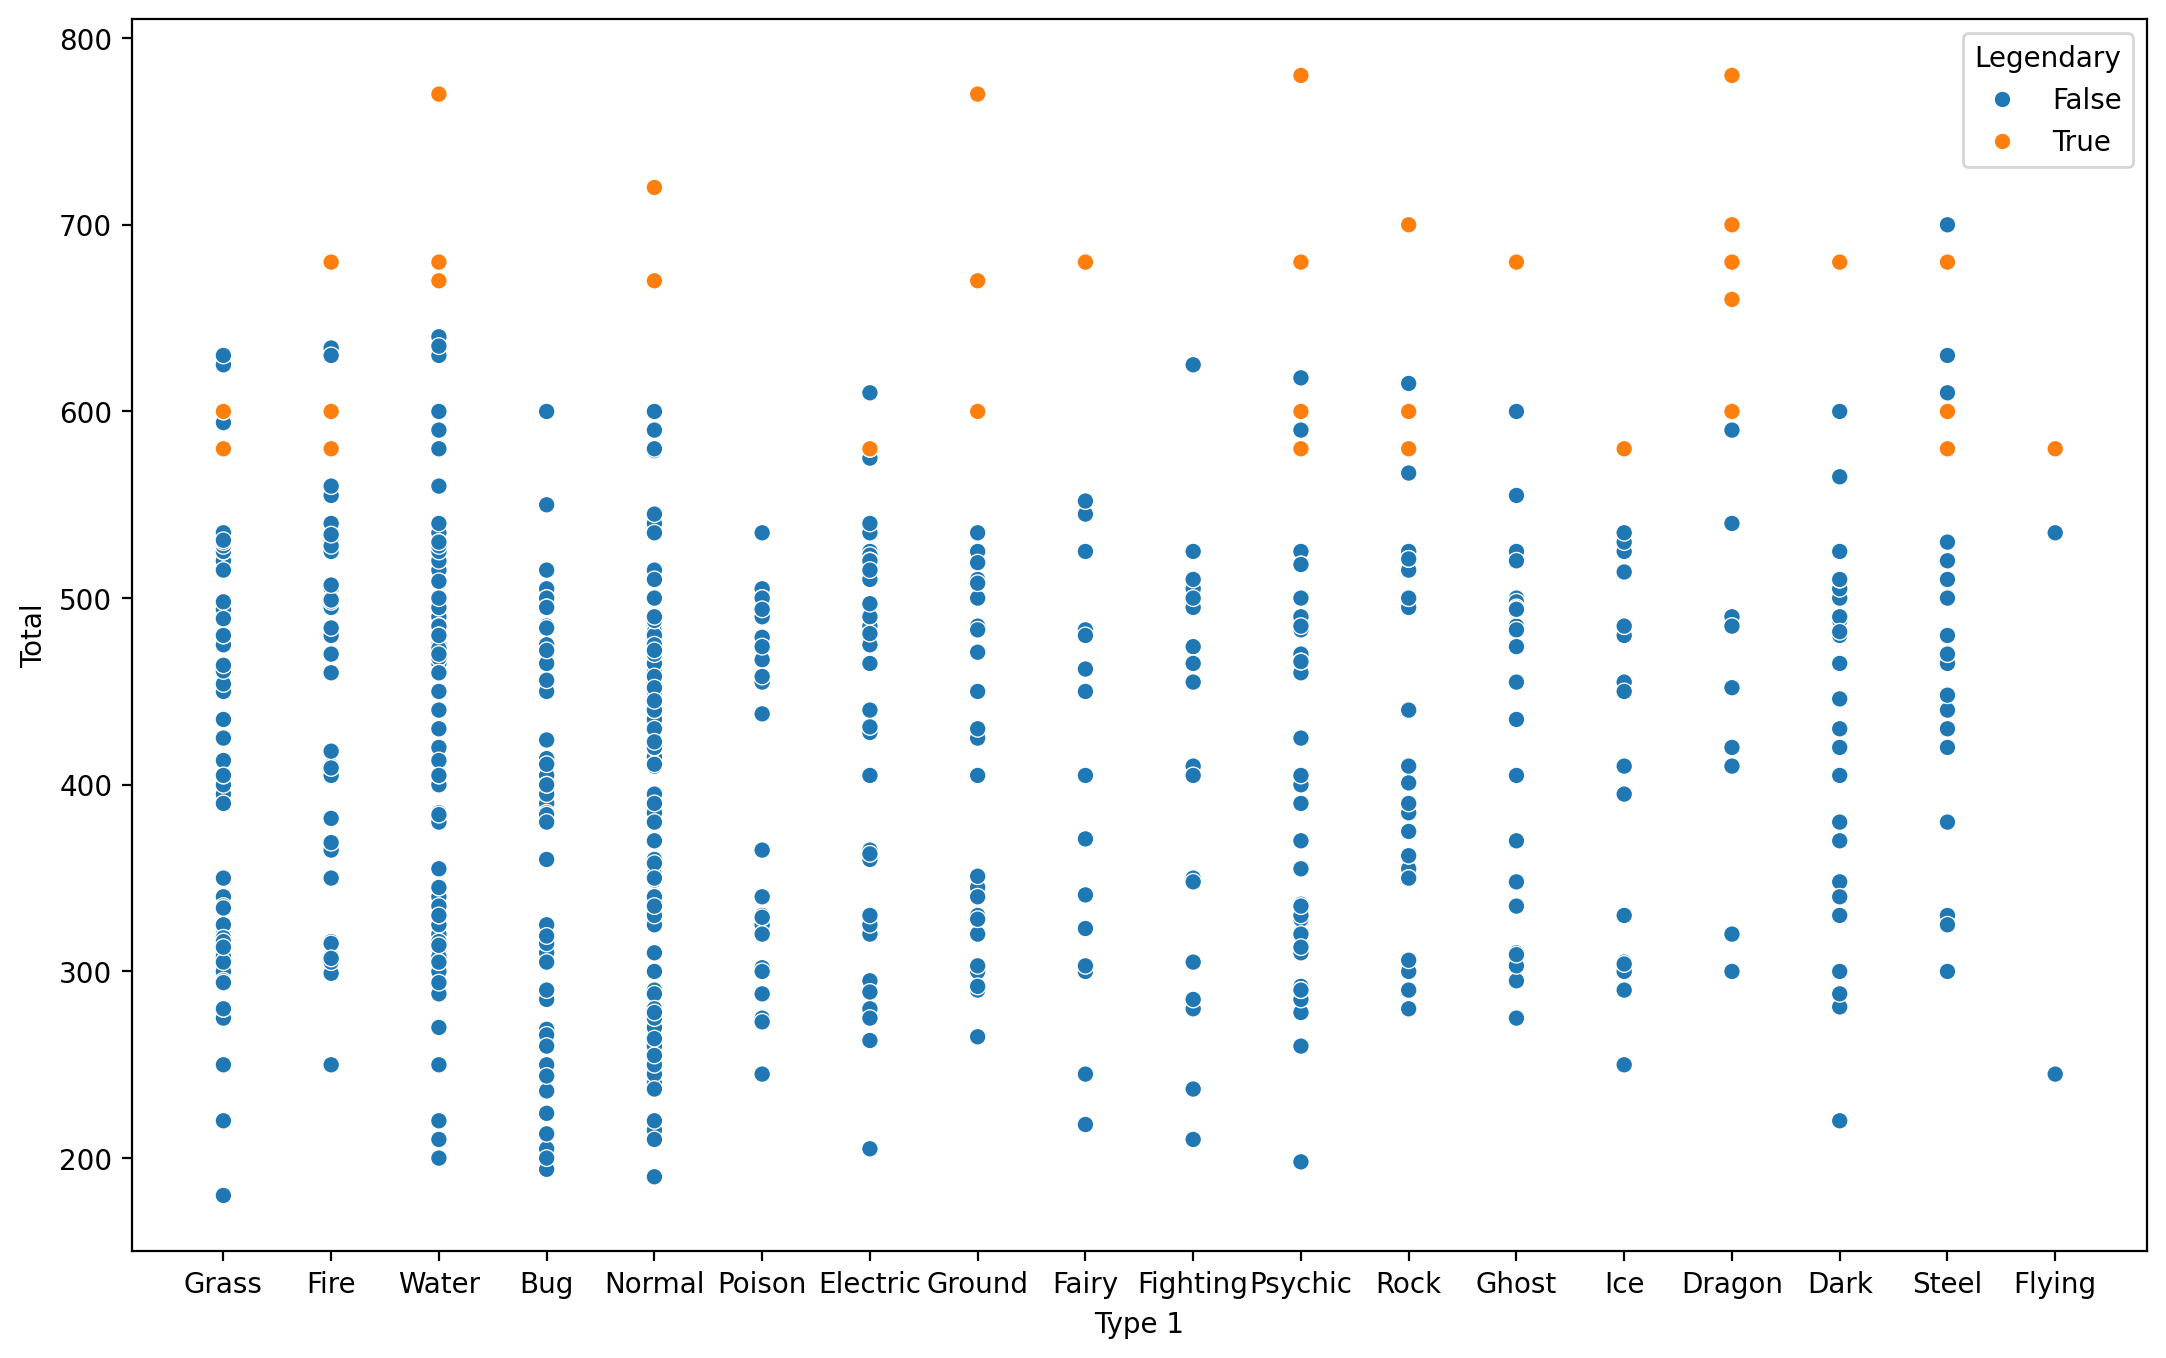

In [56]:
# Total값에 따른 분포 plot
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

전설의 포켓몬은 주로 Total 스탯 값이 높다는 것이 확인하였다.

#### 세부 스탯

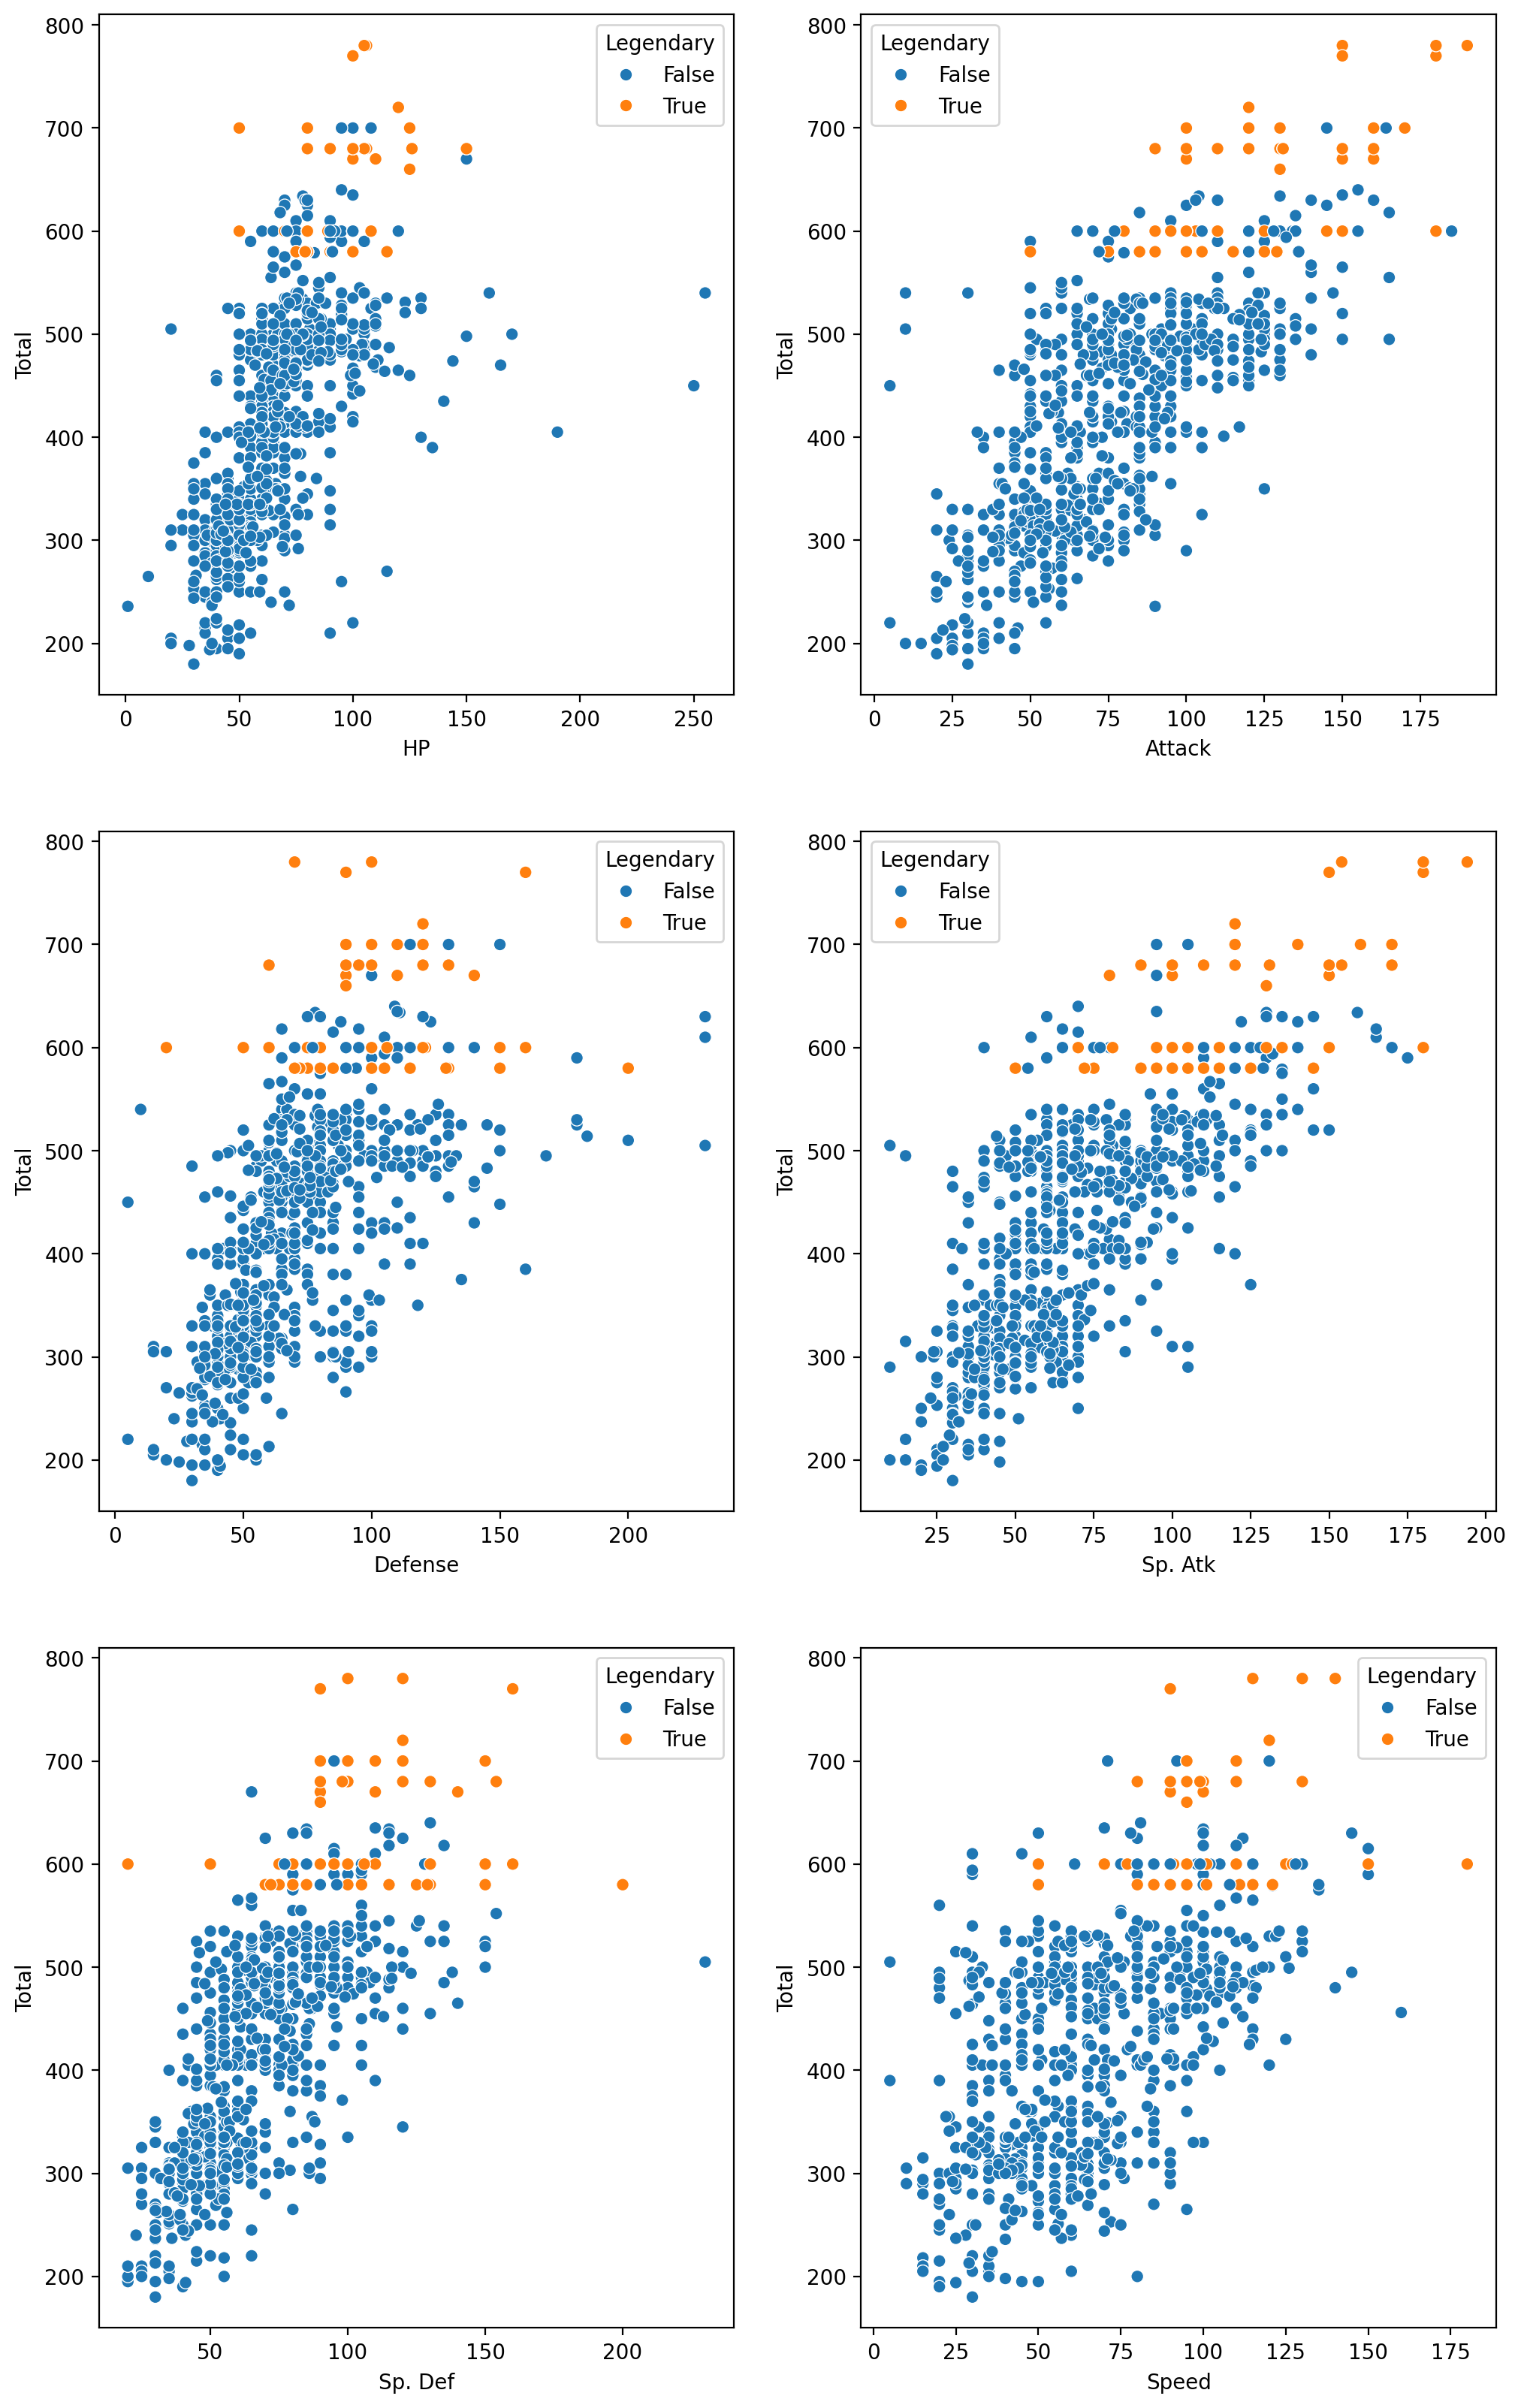

In [60]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 20)

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax =ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax =ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax =ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax =ax6)

plt.show()

 - HP, Defense, Sp. Def
  - 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있다.
 - Attack, Sp. Atk, Speed
  - 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있다.

#### 세대

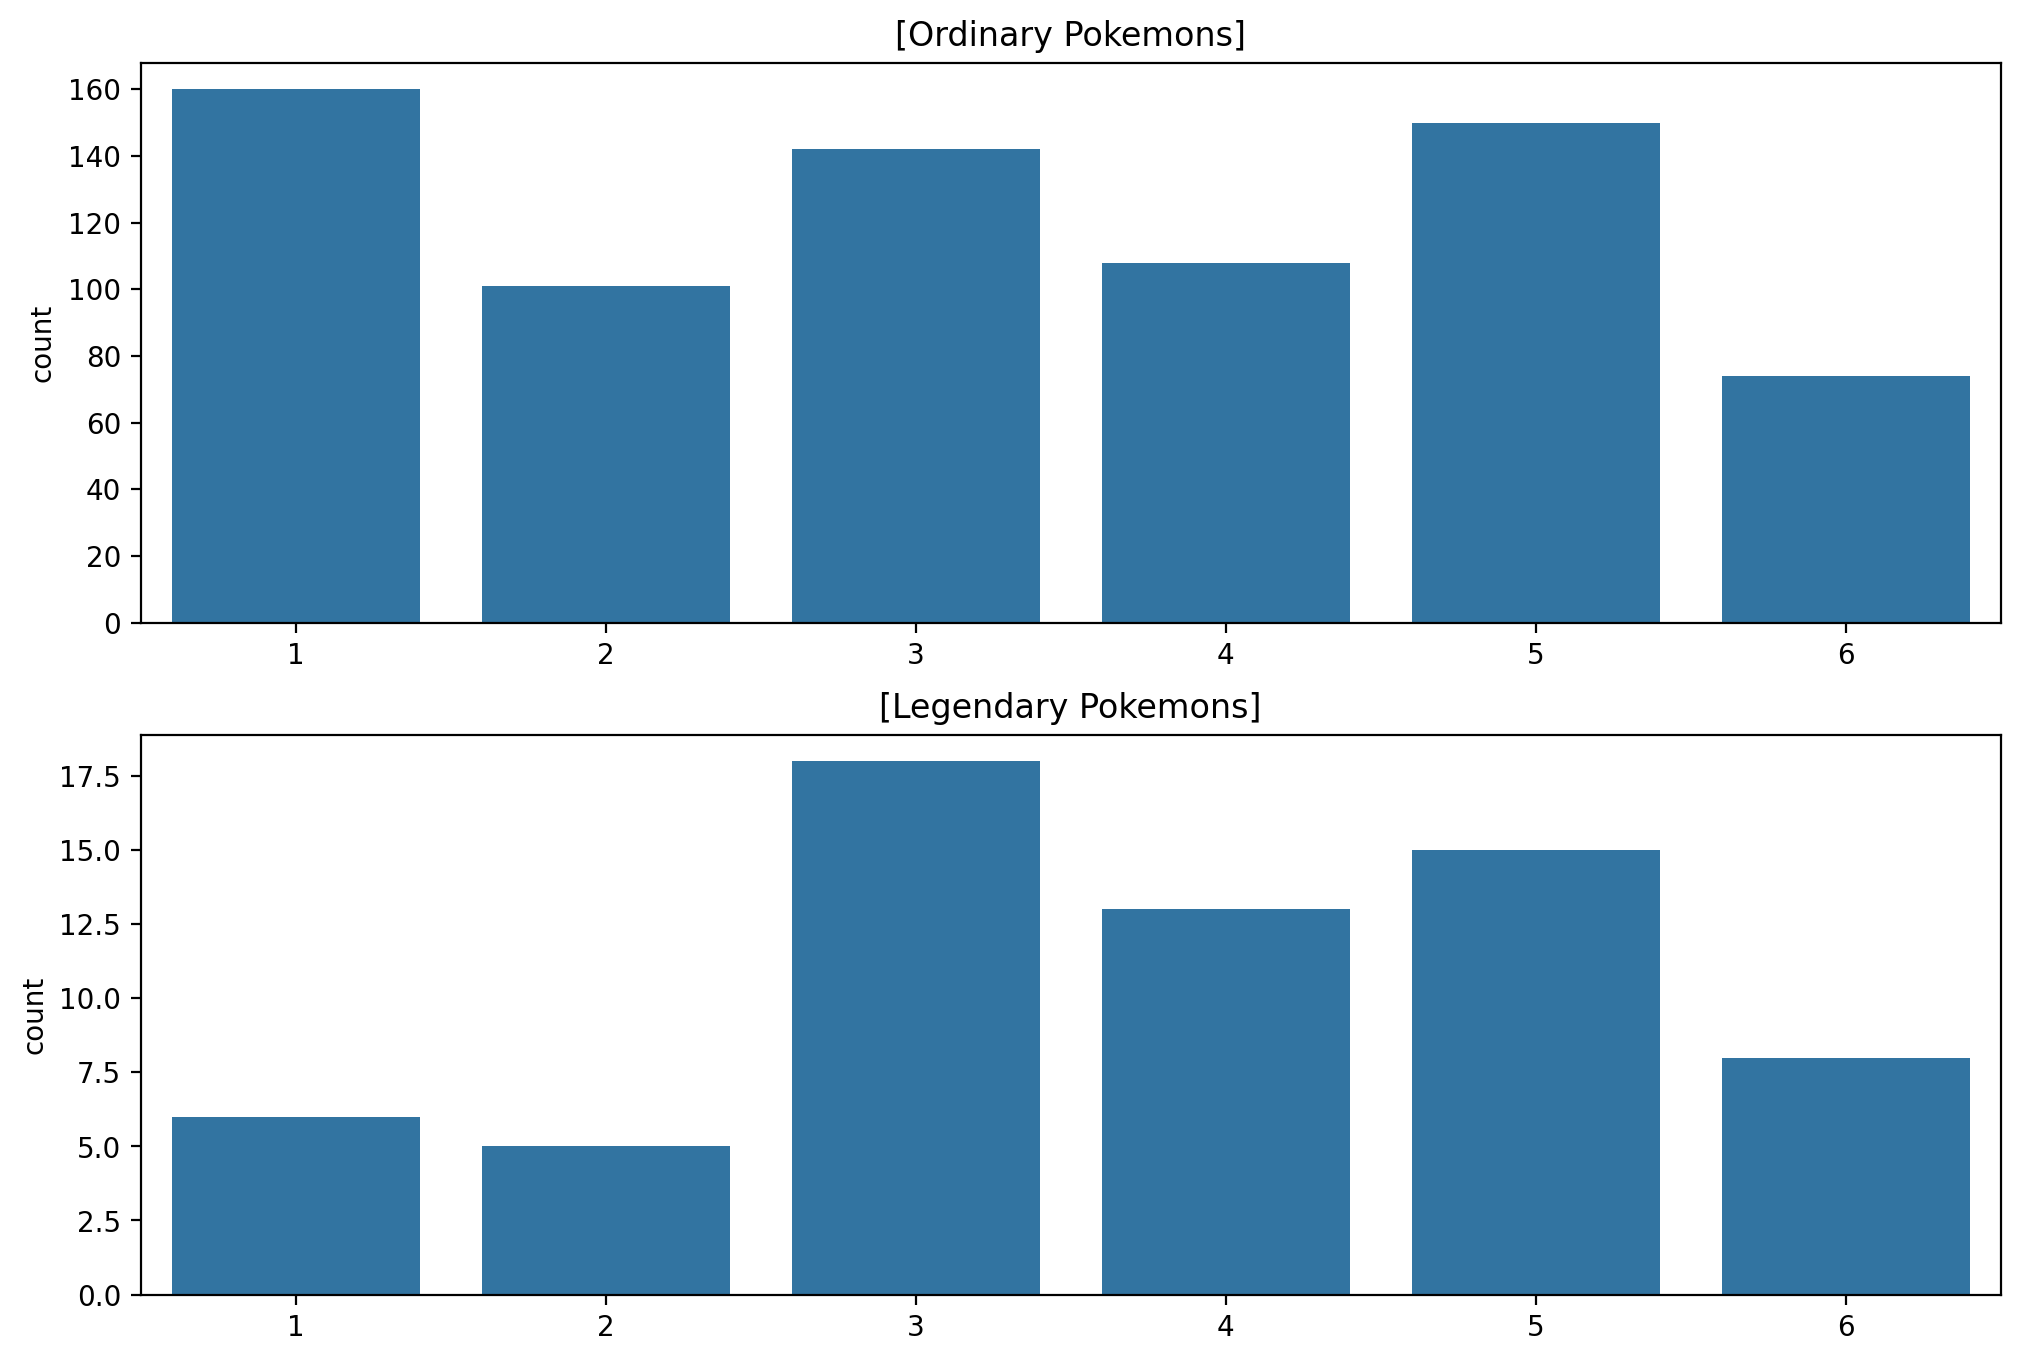

In [63]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

세대에서 전설의 포켓몬은 3세대부터 많아졌다가, 6세대에 다시 줄어든 것을 확인할 수 있다.

### 스탯을 분석하여 구분

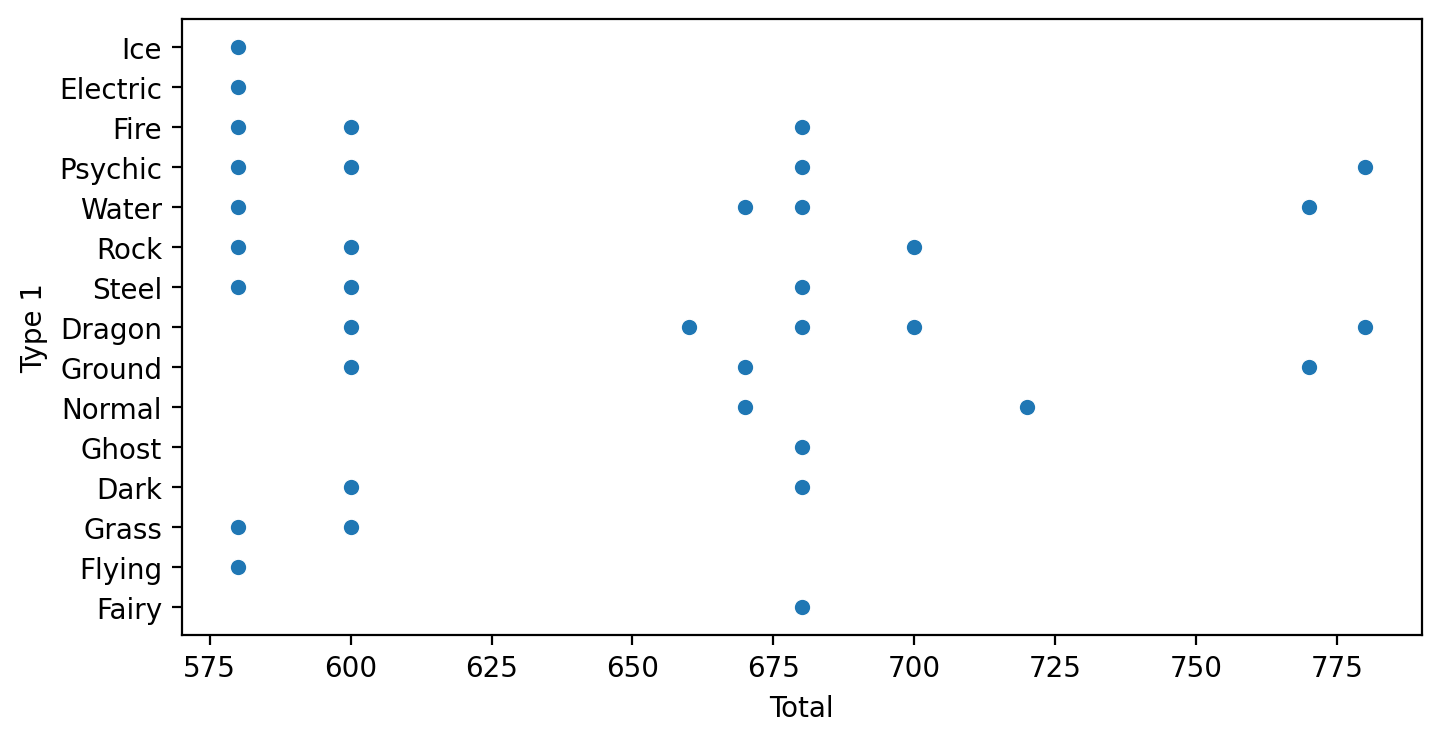

In [64]:
# 전설의 포켓몬의 Total 값
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [ ]:
# 전설의 포켓몬이 가지는 Total값들의 집합
print(sorted(list(set(legendary["Total"]))))

9가지 값을 가진다.

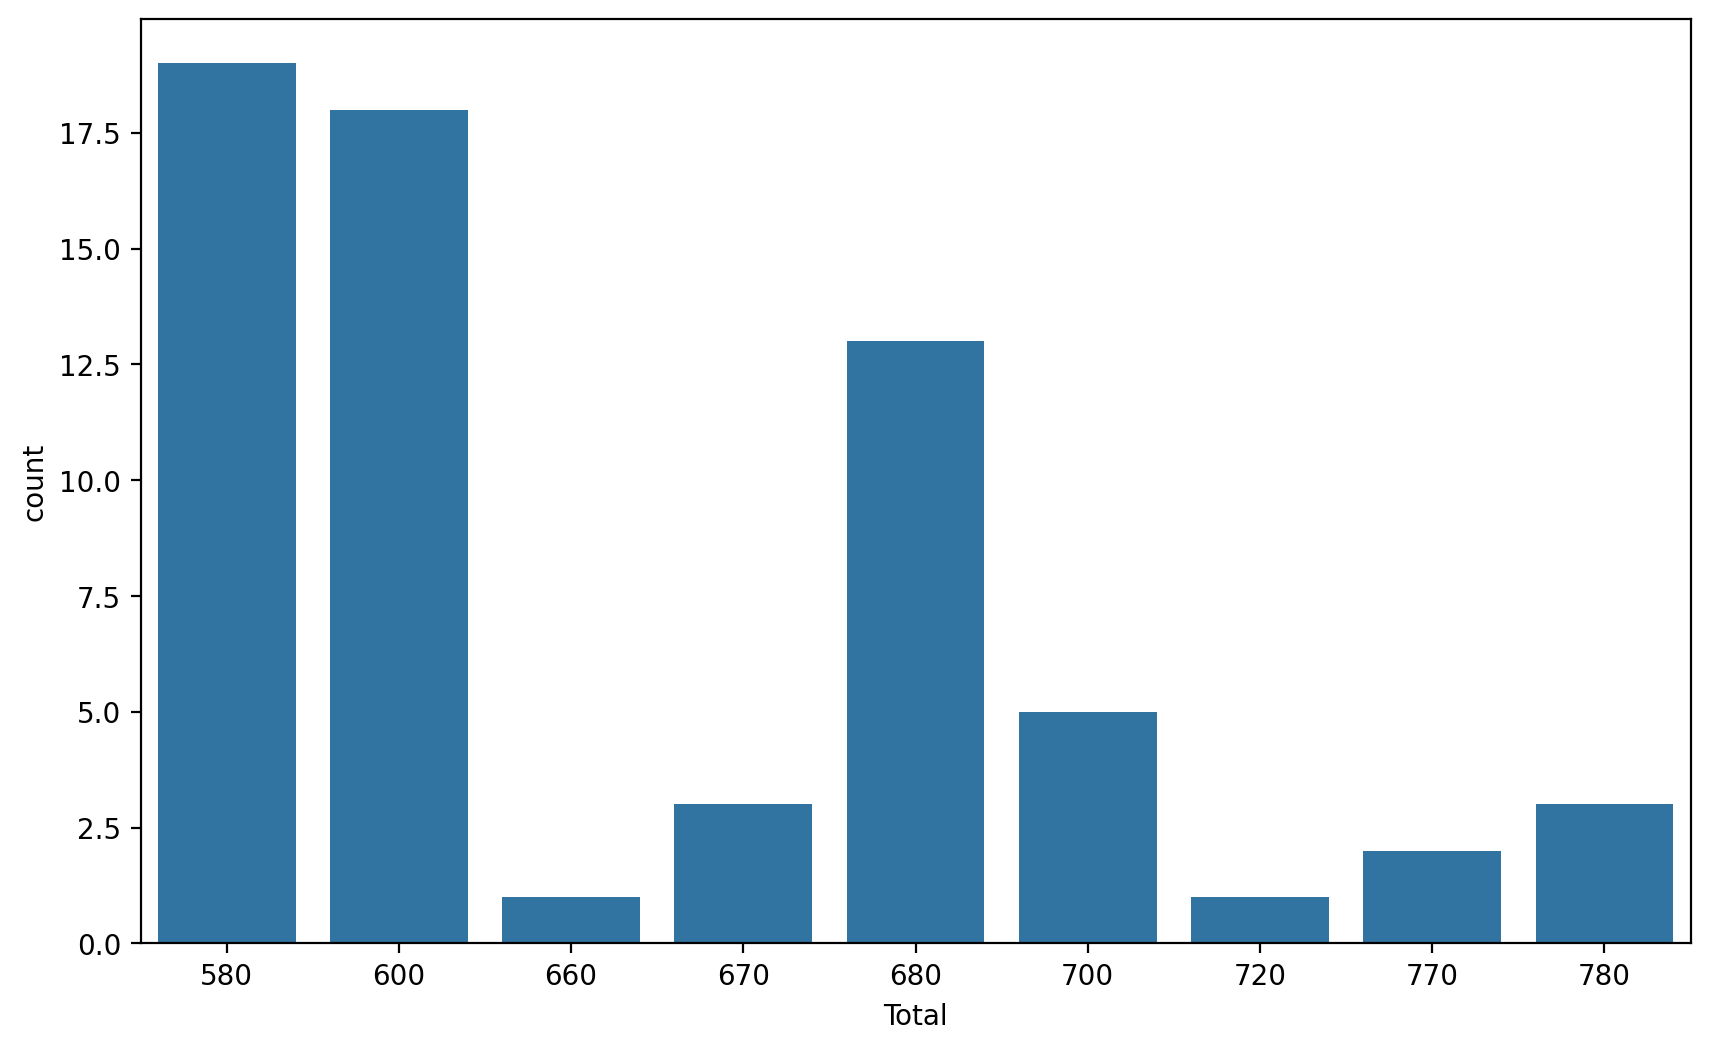

In [67]:
# 전설의 포켓몬이 가지는 각 Total값에 대한 포켓몬 수를 확인
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.countplot(data=legendary, x="Total")
plt.show()

In [68]:
round(65 / 9, 2)

7.22

전설의 포켓몬 약 7.22마리는 같은 Total 스탯 값을 가진다.

In [69]:
# 일반포켓몬이 가지는 Total값들의 집합
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [70]:
# 일반포켓몬이 가지는 Total 집합의 크기 확인
print(len(sorted(list(set(ordinary["Total"])))))

195


In [71]:
round(735 / 195, 2)

3.77

일반 포켓몬 약 3.77마리만 같은 Total 스탯 값을 가진다.

####분석 결과

1.전설의 포켓몬의 Total값은 다양하지 않다.

2.전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재한다.

Total값은 legendary인지 아닌지를 예측하는 데에 중요하다는 것을 알 수 있다.

### 이름의 길이로 구분

In [73]:
# 비슷한 이름을 가진 포켓몬
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [77]:
# legendary에 "name_count"라는 이름의 길이를 나타내는 컬럼 생성
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [78]:
# ordinary에 "name_count"라는 이름의 길이를 나타내는 컬럼 생성
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


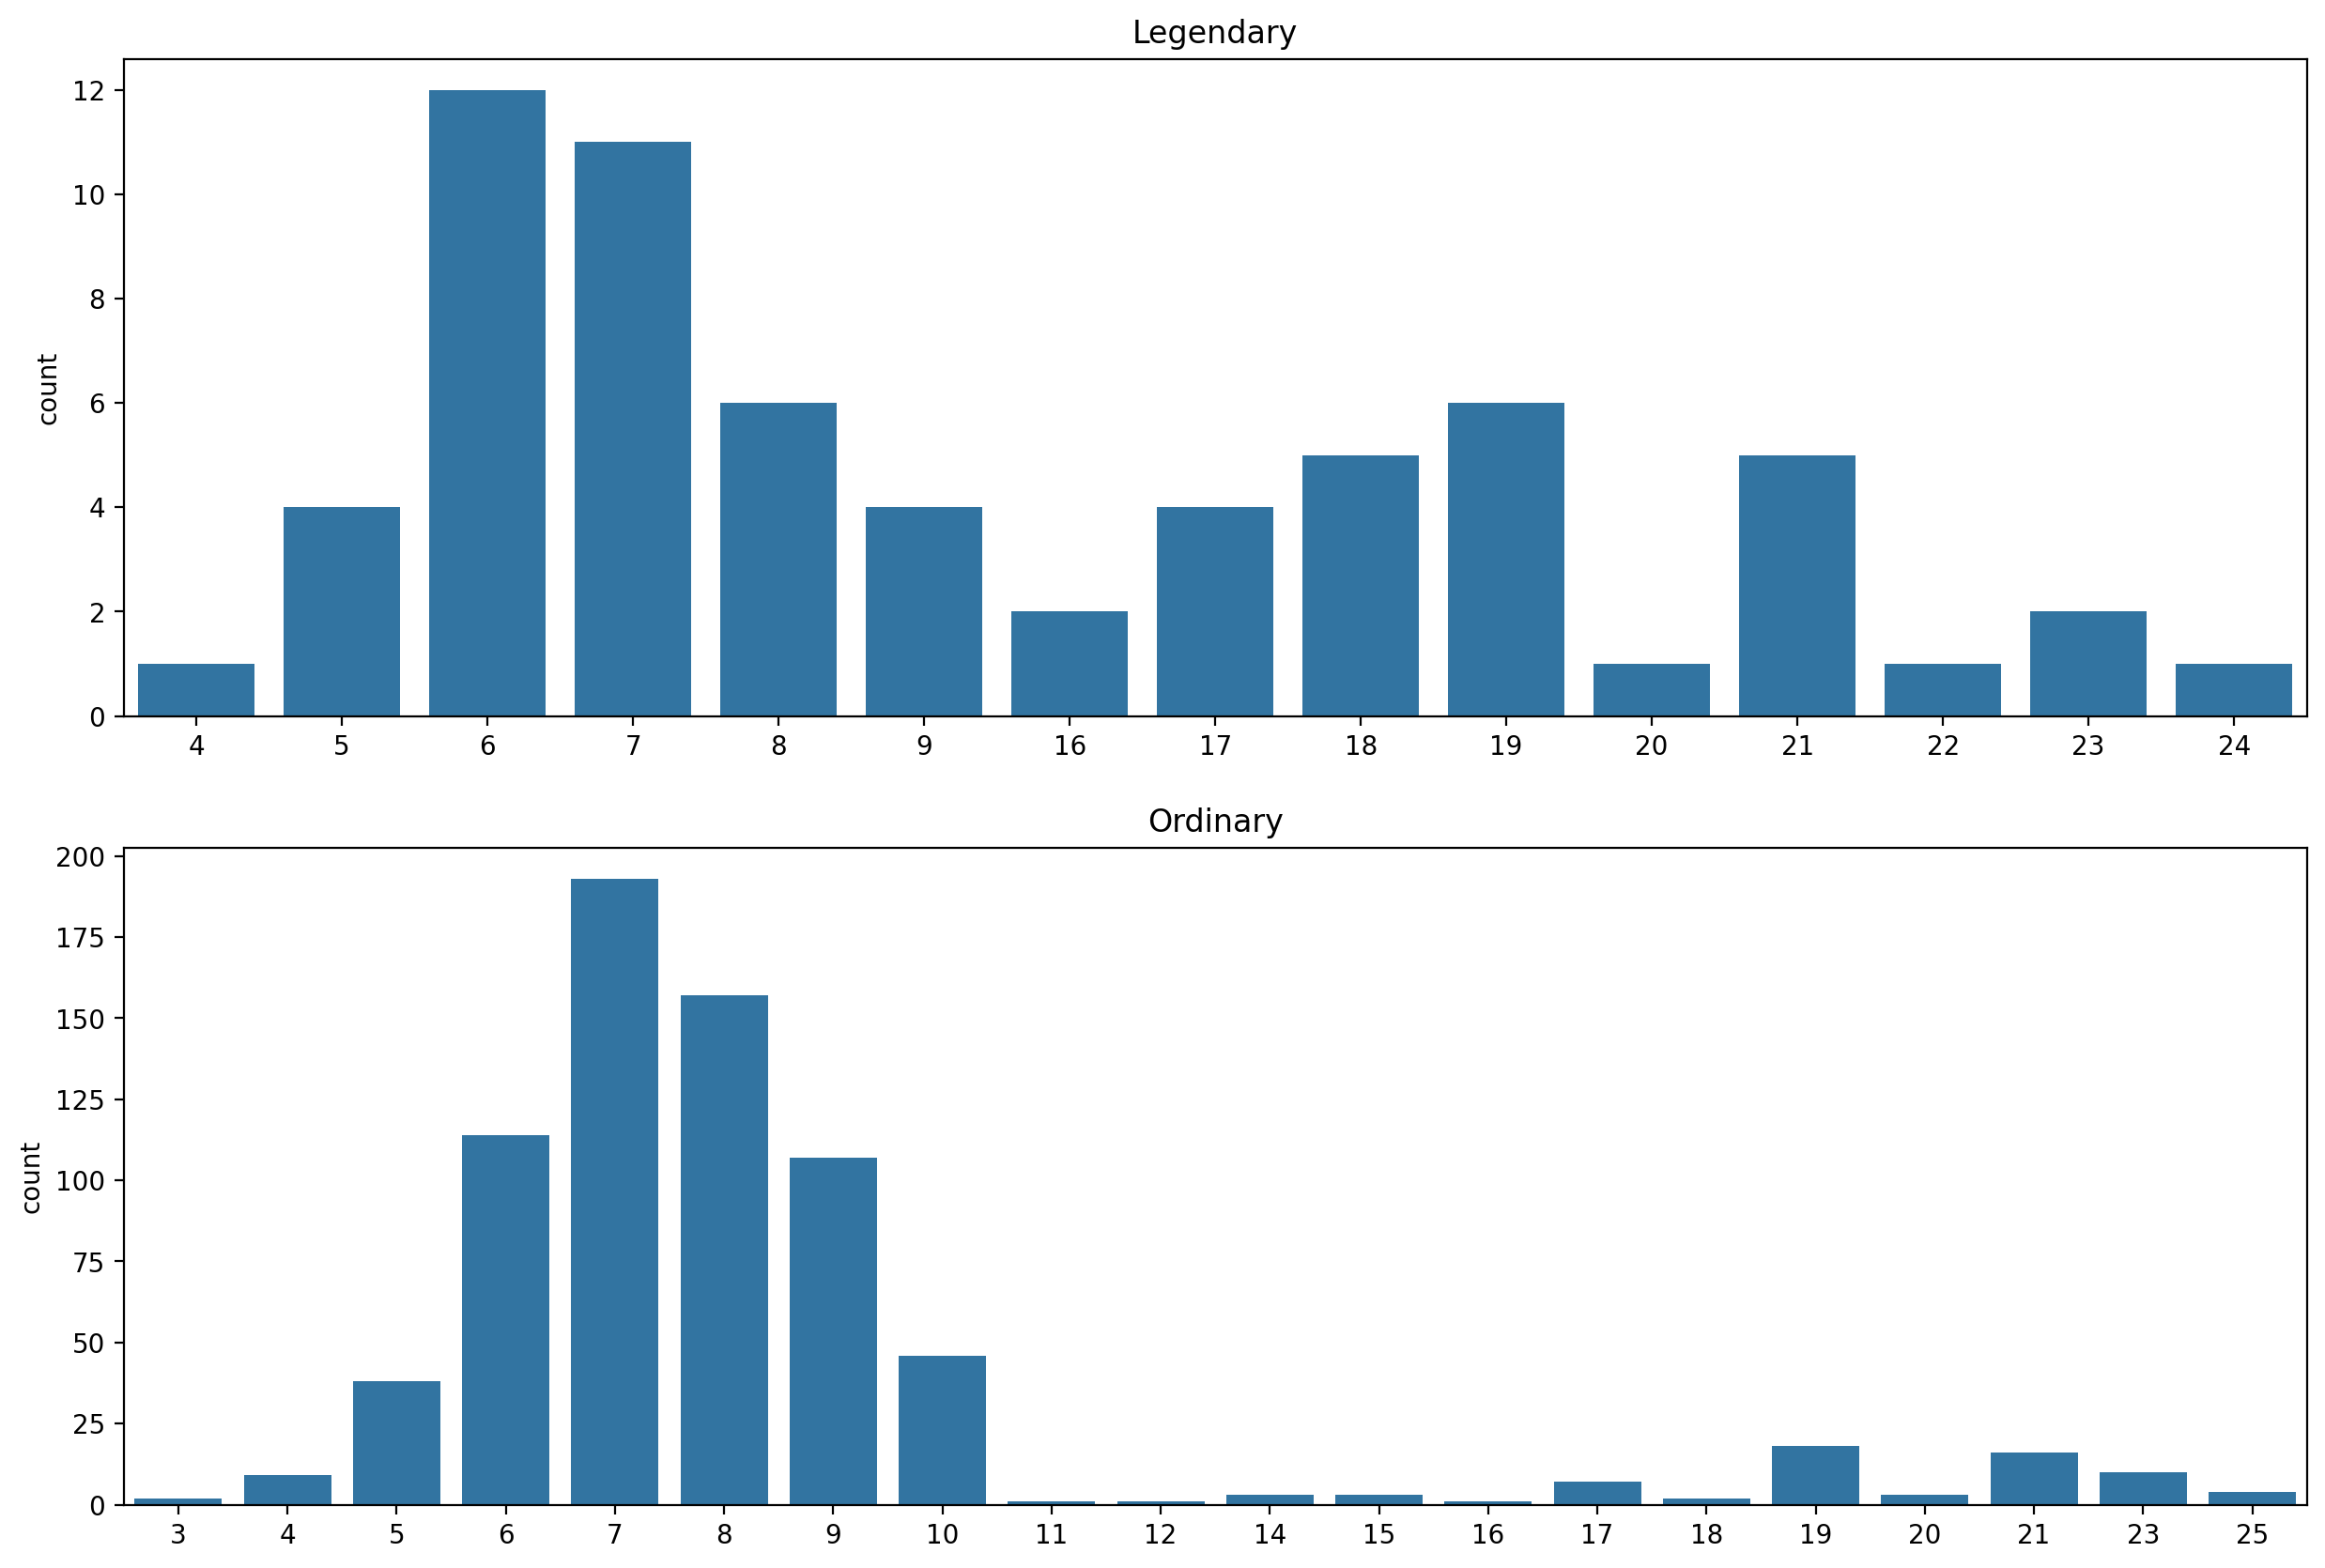

In [79]:
plt.figure(figsize=(15, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮다. 이를 통해 legendary인지 아닌지를 구분하는 데 큰 의미를 가진다.

# 단계 2.데이터 전처리
---

문자열로 구성된 이름을 전처리를 통해 True, False의 부울 데이터로 변환

In [81]:
# 이름의 길이를 확인할 수 있는 name_count 컬럼을 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [83]:
# 이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼을 생성
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


이름은 총 네 가지 타입
- 한 단어면 ex. Venusaur
- 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
- 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X
- 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

#### 알파벳이 아닌 문자가 들어간 경우

In [84]:
# 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리해서 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [85]:
# isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [86]:
# 알파벳이 아닌 다른 문자가 이름에 포함된 경우
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [87]:
# pandas의 replace 함수를 사용하여 이름을 바꿔준다.
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [88]:
# 다시 isalpha()함수로 체크
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].str.isalpha()
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


name_isalpha 컬럼이 False인 컬럼이 하나도 없음을 확인.

#### 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화

In [89]:
# 정규식 re 패키지를 사용
import re

# 전체 데이터셋에 정규표현식 적용
def tokenize(name):
    tokens = re.findall('[A-Z][a-z]*', name)

    return np.array(tokens)

all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

중복된 것을 제외하면 총 65개의 토큰

#### 토큰이 사용된 개수

In [91]:
# Counter 객체를 사용
from collections import Counter

# str.contains 함수로 특정 구문이 포함되어 있는지 확인
most_common = Counter(token_set).most_common(10)
for token, _ in most_common:
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


이름에 맞게 True 또는 False가 처리된 것을 확인할 수 있다.

#### 범주형 데이터 전처리

- 18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)합니다.
- 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.

In [92]:
# 18개의 컬럼에 대해 원-핫 인코딩
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Normal,Ghost,Psychic,Fire,Dark,Electric,Bug,Ground,Water,Rock,Ice,Fighting,Dragon,Grass,Fairy,Flying,Steel,Poison
0,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,Fire,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- 0번 포켓몬의 경우 첫 번째 속성이 풀(Grass), 두 번째 속성이 독(Poison)이므로 서로 맞는 컬럼에만 True값을 가지는 것을 확인
- Type별로 원-핫 인코딩이 잘 된것을 확인

# 단계 3.모델링
---

#### 기본 모델

In [94]:
# 원본 데이터의 컬럼
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [95]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

다음 컬럼 중 의미 없는 컬럼인 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하고 사용

In [98]:
# target 데이터인 Legendary 변수에 저장
target = 'Legendary'

In [99]:
# X 변수에 features 컬럼에 해당하는 데이터 저장
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [100]:
# y 변수에 target 컬럼에 해당하는 데이터 저장
y = original_data[target]
print(y.shape)
y.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [101]:
# 훈련 데이터와 학습 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


#### 기본 모델이 동작

In [102]:
# 의사 결정 트리(decision tree) 를 사용
from sklearn.tree import DecisionTreeClassifier

# random_state 함수로 모델의 랜덤성을 제어
model = DecisionTreeClassifier(random_state=25)

# 모델을 훈련 데이터로 학습시키고 학습 데이터를 예측
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# sklearn.metrics의 confusion_matrix로 결과를 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

- 왼쪽 위부터 순서대로 TN, FP, FN, TP를 나타낸다.
- Positive는 Legendary=True(전설의 포켓몬)
- Negative는 Legendary=False(일반 포켓몬)

Accuracy = (TP + TN) / (TP + TN + FP + FN)
152 / 160 * 100 = 95%

- 800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞히고 들어간다는 것을 뜻한다.
- 즉, 아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다는 것이다.
따라서 이번 데이터셋에서는 정확도로 모델의 성능을 평가하는 것은 거의 의미가 없습니다.

따라서 정확도 외에 다른 척도로 모델의 성능을 평가해 볼 필요가 있다.

In [103]:
# classification_report를 활용하여 다른 값들도 확인
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



recall값이 0.62

Recall= 1/(FN+TP)*TP

- Recall이 낮다는 것은 분모에 있는 FN값이 높다는 것을 뜻
- 전설의 포켓몬인데 일반 포켓몬이라고 판단하는 경우

#### 베이스라인 모델

In [121]:
# 전처리했던 모든 컬럼 확인
print(len(pokemon.columns))
pokemon.columns

45


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Normal', 'Ghost', 'Psychic', 'Fire', 'Dark', 'Electric', 'Bug',
       'Ground', 'Water', 'Rock', 'Ice', 'Fighting', 'Dragon', 'Grass',
       'Fairy', 'Flying', 'Steel', 'Poison'],
      dtype='object')

In [122]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

- "#" : ID에 해당하는 데이터로, index의 의미 외에 특별한 의미가 담긴 특징이 아니기 때문에 제외
- "Name" : 문자열 데이터로, 전처리를 통해 "name_count"와 "long_name", 그리고 15개의 토큰 컬럼으로 대체
- "name_nospace", "name_isalpha" : 전처리를 위해 필요했던 컬럼으로 분류 분석에는 필요하지 않음
- "Type 1" & "Type 2" : 속성은 원-핫 인코딩으로 처리했기 때문에 더 이상 필요가 없음
- "Legendary" : 이 컬럼은 target 데이터이므로 모델이 학습하는 "X" 데이터에는 넣지 않고, "y" 데이터로 사용

In [123]:
# target 데이터인 Legendary 변수에 저장
target = 'Legendary'

In [124]:
# X 변수에 features 컬럼에 해당하는 데이터 저장
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [125]:
# y 변수에 target 컬럼에 해당하는 데이터 저장
y = pokemon[target]
print(y.shape)
y.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [126]:
# 훈련 데이터와 학습 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


#### 베이스라인 모델 동작

In [140]:
# 의사 결정 트리(decision tree) 를 사용
from sklearn.tree import DecisionTreeClassifier

# random_state 함수로 모델의 랜덤성을 제어
model = DecisionTreeClassifier(random_state=25)

# 모델을 훈련 데이터로 학습시키고 학습 데이터를 예측
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# sklearn.metrics의 confusion_matrix로 결과를 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# classification_report를 활용하여 다른 값들도 확인
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



피쳐 엔지니어링을 하기 전 약 0.62에 그쳤던 recall값이 피쳐 엔지니어링을 한 후 무려 0.92로까지 오른것을 확인할 수 있다.

# 단계 4. 비교 모델
---

#####랜덤 포레스트

In [141]:
# 랜덤 포레스트(Random Forest)를 사용
from sklearn.ensemble import RandomForestClassifier

# random_state와 n_estimators 매개변수로 모델 설정
# n_estimators는 생성할 트리의 개수를 지정합니다
model = RandomForestClassifier(n_estimators=100, random_state=25)

# 모델을 훈련 데이터로 학습시키고 테스트 데이터를 예측
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# sklearn.metrics의 confusion_matrix로 결과를 확인
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# classification_report를 활용하여 다른 성능 지표들도 확인
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[[143   4]
 [  3  10]]
              precision    recall  f1-score   support

       False       0.98      0.97      0.98       147
        True       0.71      0.77      0.74        13

    accuracy                           0.96       160
   macro avg       0.85      0.87      0.86       160
weighted avg       0.96      0.96      0.96       160



의사 결정 트리와 랜덤 포레스트를 비교했을 때 recall 값이 의사 결정 트리가 0.15 높은걸 알 수 있다.

#####SVM

In [142]:
from sklearn.svm import SVC

# SVM 모델 생성
model = SVC(kernel='rbf', random_state=25)

# 모델 학습 및 예측
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 결과 평가
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[145   2]
 [  6   7]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       147
        True       0.78      0.54      0.64        13

    accuracy                           0.95       160
   macro avg       0.87      0.76      0.80       160
weighted avg       0.95      0.95      0.95       160



의사 결정 트리와 SVM을 비교했을 때 recall 값이 의사 결정 트리가 0.38 높은걸 알 수 있다.

#####로지스틱 회귀

In [144]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
model = LogisticRegression(max_iter=10000, random_state=25)

# 모델 학습 및 예측
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 결과 평가
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[143   4]
 [  2  11]]
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.73      0.85      0.79        13

    accuracy                           0.96       160
   macro avg       0.86      0.91      0.88       160
weighted avg       0.97      0.96      0.96       160



의사 결정 트리와 로지스틱 회귀를 비교했을 때 recall 값이 의사 결정 트리가 0.07 높은걸 알 수 있다.

# 단계 5.결론
---

### 회고
다양한 특성들을 새로 만들어주고 또한 전처리를 하는 피처 엔지니어링의 중요성을 느꼈다.

### ref
---

- [파이썬 차집합 함수(set difference)](https://www.w3schools.com/python/ref_set_difference.asp)
- [판다스 isna() 함수](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)
- [람다 표현식과 자주 쓰이는 함수들, map(), filter(), reduce()](https://modulabs.co.kr/blog/lambda_map_filter_reduce)
- [pandas의 isalpha() 함수](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isalpha.html)
- [위키독스-정규표현식 시작하기](https://wikidocs.net/4308)
- [Counter](https://docs.python.org/3/library/collections.html#counter-objects)
- [pandas의 == 문법](https://pandas.pydata.org/docs/user_guide/basics.html#comparing-if-objects-are-equivalent)
- [Confusion Matrix 해석 방법](http://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)